<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!pip install yfinance
#!pip install finta

# 載入資料

提示詞:使用yfinance和datetime模組取得近5年的蘋果股價資料並命名為df

In [18]:
import yfinance as yf
from datetime import datetime, timedelta

# 設定開始和結束日期
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

# 使用yfinance獲取蘋果股票資料
apple = yf.Ticker("AAPL")
df = apple.history(start=start_date, end=end_date)
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-26 00:00:00-05:00,42.029552,42.754075,41.996186,42.653976,152648800,0.0,0.0
2018-02-27 00:00:00-05:00,42.684952,43.013845,42.460921,42.515736,155712400,0.0,0.0
2018-02-28 00:00:00-05:00,42.723086,43.047215,42.434708,42.451389,151128400,0.0,0.0
2018-03-01 00:00:00-05:00,42.551486,42.847016,41.150106,41.707798,195208000,0.0,0.0
2018-03-02 00:00:00-05:00,41.183467,42.017623,41.100050,41.996174,153816000,0.0,0.0


# Label

我要製作一個函數名稱叫做add_label_column
輸入參數為:df,shift_day,lb,ub
其中df是一個dataframe,此dataframe之index為時間並且有一個欄位名叫'Close'
add_label_column函數內部要做的事情如下:
增加一個欄位叫做'signal',其中該欄位的數值計算方式如下:
若未來shift_day後的Close 大於 當前Close*ub則為 1
若未來shift_day後的Close 小於 當前Close*lb則為 -1
其他情況則預設為0
最後 return 增加過'signal'欄位的df

In [19]:
def add_label_column(df, shift_day, lb, ub):
    # 建立一個名為 'signal' 的新欄位，並初始化為 0
    df['signal'] = 0
    
    # 計算 Close 的 shift_day 天後的值，並將其儲存在 'future_close' 欄位中
    df['future_close'] = df['Close'].shift(-shift_day)
    
    # 判斷未來的 Close 是否大於或小於當前 Close 的上下限門檻，如果是，則在 'signal' 欄位中設置對應的值
    df.loc[df['future_close'] > df['Close'] * ub, 'signal'] = 1
    df.loc[df['future_close'] < df['Close'] * lb, 'signal'] = -1
    
    # 刪除 'future_close' 欄位，因為它只是用於計算 'signal' 值，不需要保留
    df = df.drop('future_close', axis=1)
    
    # 返回新增 'signal' 欄位後的 DataFrame
    return df
df = add_label_column(df, shift_day=7, lb=0.97, ub=1.03)
df.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal
Date,,,,,,,,
2023-01-26 00:00:00-05:00,142.951735,144.030091,141.683667,143.740540,54105100,0.00,0.0,1
2023-01-27 00:00:00-05:00,142.941753,147.005541,142.861874,145.707520,70492800,0.00,0.0,1
2023-01-30 00:00:00-05:00,144.739016,145.328113,142.632232,142.781998,64015300,0.00,0.0,1
2023-01-31 00:00:00-05:00,142.482450,144.119949,142.063092,144.070023,65874500,0.00,0.0,1
2023-02-01 00:00:00-05:00,143.750517,146.386491,141.104563,145.208282,77663600,0.00,0.0,1
2023-02-02 00:00:00-05:00,148.673001,150.949524,147.944119,150.590088,118339000,0.00,0.0,0
2023-02-03 00:00:00-05:00,147.804328,157.140080,147.604636,154.264465,154279900,0.00,0.0,0
2023-02-06 00:00:00-05:00,152.337419,152.866610,150.550139,151.498688,69858300,0.00,0.0,0
2023-02-07 00:00:00-05:00,150.410349,154.993348,150.410349,154.414230,83322600,0.00,0.0,0


# 檢查Label

我有一個dataframe其中有一個欄位叫做signal有三個類別(-1,0,1)
請幫我可視化該欄位每個類別的數量,用直方圖呈現

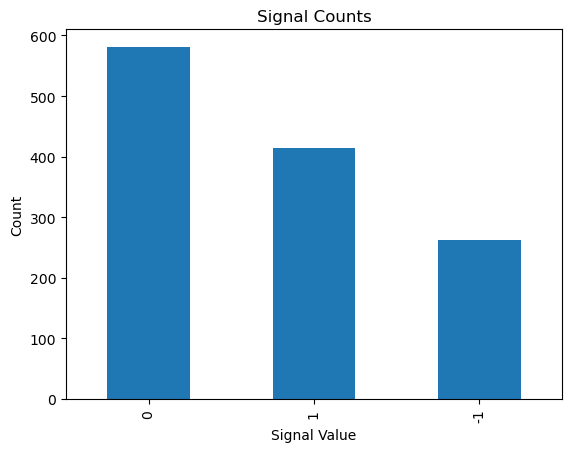

In [20]:
import matplotlib.pyplot as plt

# 繪製直方圖
df['signal'].value_counts().plot(kind='bar')

# 設置標題和標籤
plt.title('Signal Counts')
plt.xlabel('Signal Value')
plt.ylabel('Count')

# 顯示圖形
plt.show()

# 檢查Label V2

我有一個dataframe名為df內含一個欄位名為Close和一個欄位名為signal
新增一個變量名為df_recent代表最近100天的df資料
然後根據df_recent用matplotlib畫圖
繪製Close之折線圖
然後命名一個變量為buy和一個變量為sell
分別代表的意義為df的signal為1時的Close序列和df的signal為-1時的Close序列
並用plt.scatter繪圖
其中針對buy序列顏色用紅色圖案用向上箭頭
其中針對sell序列顏色用黑色圖案用向下箭頭


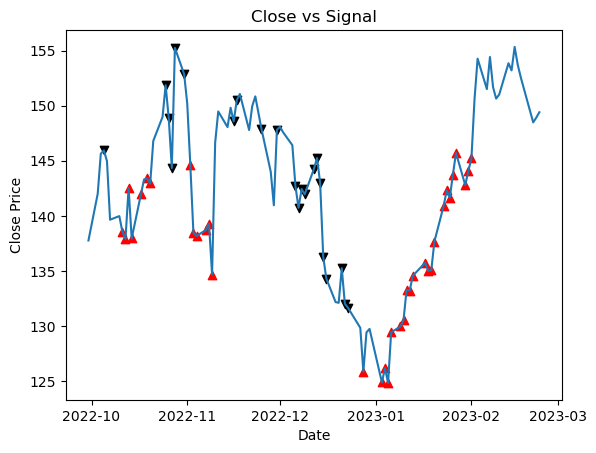

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設您已經讀取並處理好了原始資料，並存儲在 df 中
# 下面是創建 df_recent 的程式碼
df_recent = df.tail(100)

# 繪製 Close 之折線圖
plt.plot(df_recent['Close'])

# 繪製 buy 和 sell 的散點圖
buy = df_recent[df_recent['signal'] == 1]['Close']
sell = df_recent[df_recent['signal'] == -1]['Close']
plt.scatter(buy.index, buy.values, c='r', marker='^')
plt.scatter(sell.index, sell.values, c='k', marker='v')

# 設定圖形標題和軸標籤
plt.title('Close vs Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 顯示圖形
plt.show()


# 建立ohlcv

建立一個變數名為ohlcv只包含df的['Open','High','Low','Close','Volume']欄位
並將欄位名稱都改成小寫表示

In [22]:
ohlcv = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlcv.columns = ohlcv.columns.str.lower()
ohlcv

,open,high,low,close,volume
Date,,,,,
2018-02-26 00:00:00-05:00,42.029552,42.754075,41.996186,42.653976,152648800
2018-02-27 00:00:00-05:00,42.684952,43.013845,42.460921,42.515736,155712400
2018-02-28 00:00:00-05:00,42.723086,43.047215,42.434708,42.451389,151128400
2018-03-01 00:00:00-05:00,42.551486,42.847016,41.150106,41.707798,195208000
2018-03-02 00:00:00-05:00,41.183467,42.017623,41.100050,41.996174,153816000
...,...,...,...,...,...
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200


# 計算技術指標RSI

我有一個dataframe名為df
請新增一個欄位叫做RSI
該欄位使用finta的RSI技術指標函數製作
製作完畢繪製其分布圖

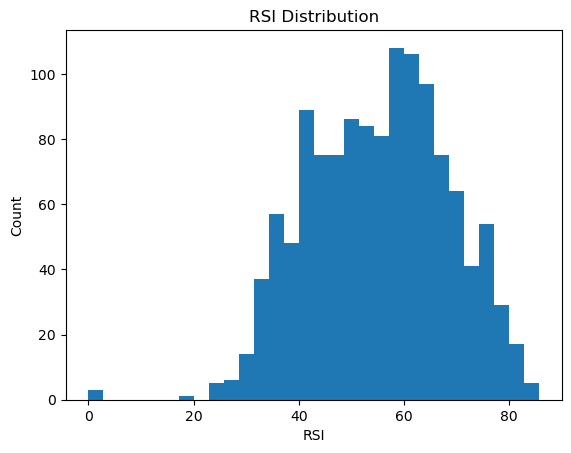

In [23]:
import finta
import pandas as pd
from finta import TA
import seaborn as sns


# 使用finta函式庫中的RSI指標函數來計算RSI值
df['RSI'] = finta.TA.RSI(ohlcv)

# 繪製RSI值的分布圖
import matplotlib.pyplot as plt

plt.hist(df['RSI'], bins=30)
plt.title('RSI Distribution')
plt.xlabel('RSI')
plt.ylabel('Count')
plt.show()


# 計算威廉指標

我有一個dataframe名為df
請新增一個欄位叫做'Williams %R'
該欄位使用finta的WILLIAMS技術指標函數製作
製作完畢繪製其分布圖

In [ ]:
# 使用finta的WILLIAMS函數計算Williams %R指標值
df['Williams %R'] = TA.WILLIAMS(df['High'], df['Low'], df['Close'], window=14)

# 繪製Williams %R分布圖
plt.hist(df['Williams %R'], bins=50)
plt.title('Williams %R Distribution')
plt.xlabel('Williams %R')
plt.ylabel('Frequency')
plt.show()

count    1245.000000
mean      -39.868618
std        31.210137
min      -100.000000
25%       -67.742361
50%       -31.655218
75%       -11.497950
max        -0.029771
Name: Williams %R, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R
Date,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379


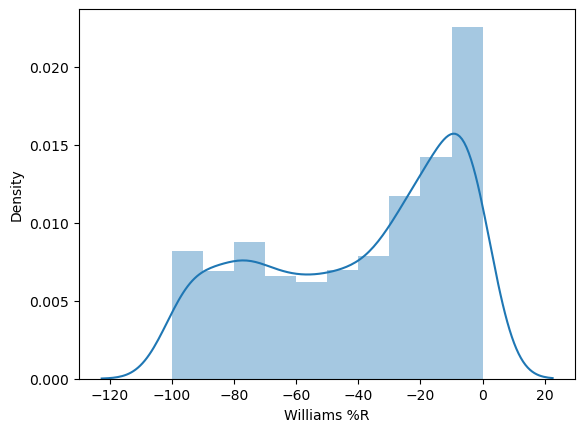

In [24]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    1218.000000
mean       99.818197
std        45.631431
min        38.245604
25%        50.764674
50%       112.700731
75%       144.857104
max       171.533221
Name: SMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA
Date,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663


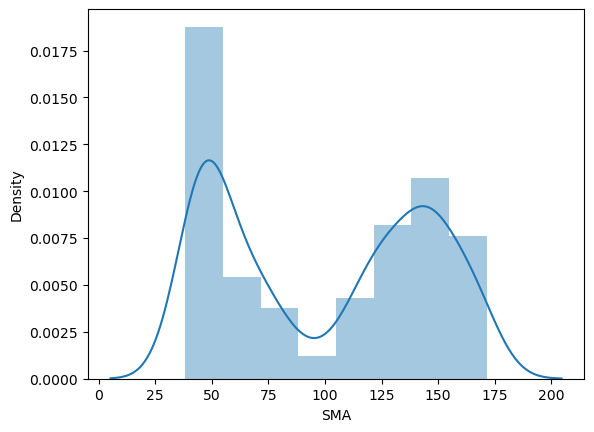

In [25]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    1258.000000
mean       99.292522
std        46.121538
min        36.625715
25%        50.424913
50%       110.739977
75%       143.713171
max       177.052838
Name: EMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000


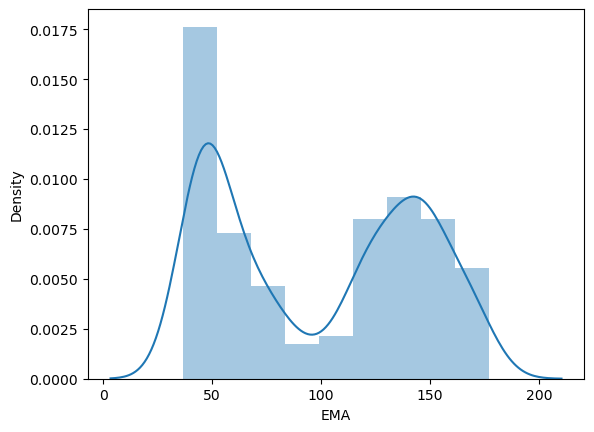

In [26]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count    1250.000000
mean       99.773731
std        46.082053
min        36.352371
25%        50.574868
50%       110.819776
75%       143.584772
max       178.000680
Name: WMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667


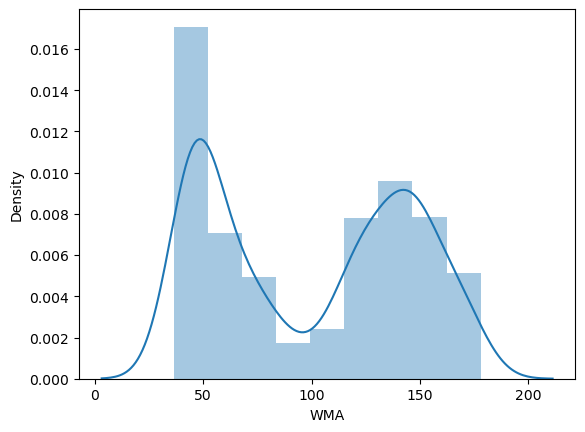

In [27]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count    1240.000000
mean      100.414493
std        46.073484
min        35.823647
25%        51.159009
50%       112.027386
75%       143.465808
max       179.425714
Name: HMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042


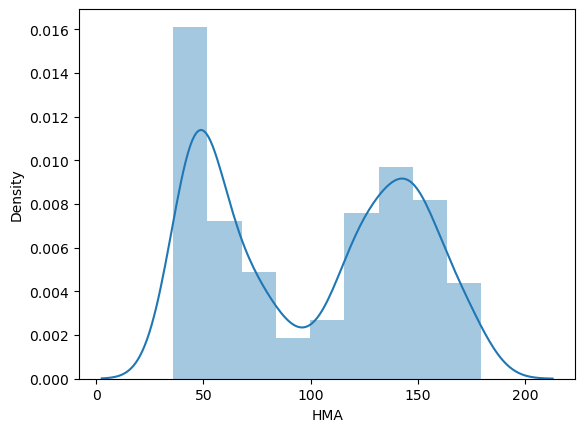

In [28]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    1258.000000
mean       99.642404
std        46.229025
min        35.522061
25%        50.660173
50%       110.080850
75%       143.724930
max       179.102448
Name: TEMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068


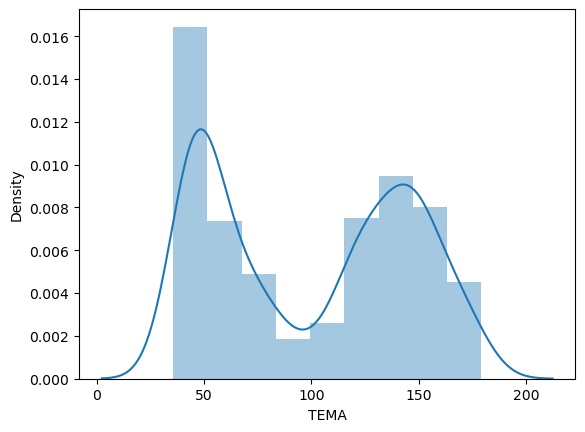

In [29]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    1257.000000
mean       31.118540
std       111.621602
min      -285.739580
25%       -64.376950
50%        56.185031
75%       117.425066
max       348.792592
Name: CCI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587


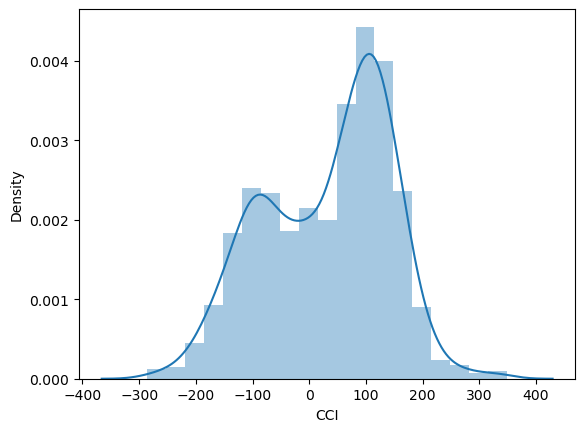

In [30]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    1257.000000
mean       11.106811
std        30.611349
min      -100.000000
25%       -11.721502
50%        12.397321
75%        34.171277
max        78.853330
Name: CMO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475


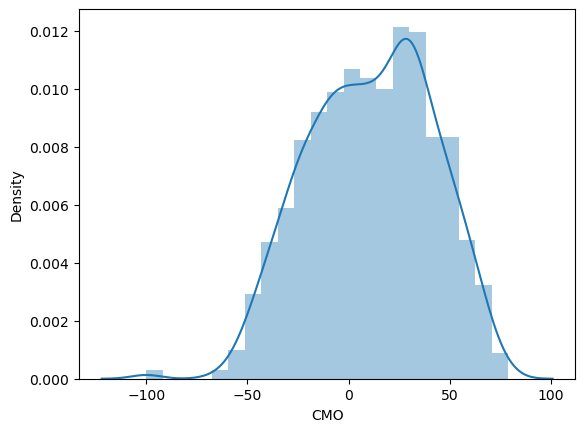

In [31]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    1258.000000
mean        0.011814
std         0.716453
min        -2.479088
25%        -0.336998
50%         0.020056
75%         0.382821
max         2.360117
Name: MACD, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360


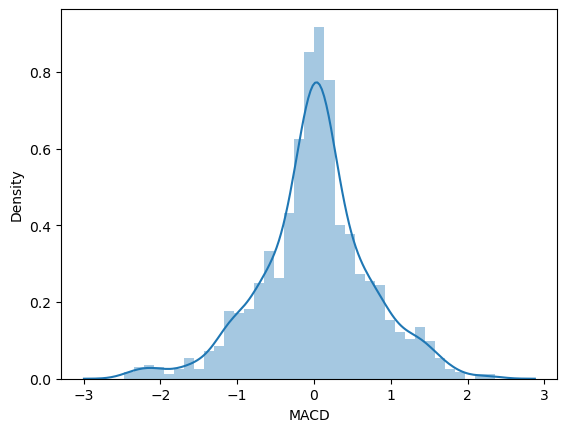

In [32]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    1258.000000
mean        0.008146
std         0.648526
min        -2.189589
25%        -0.413264
50%         0.008543
75%         0.418378
max         2.325097
Name: PPO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594


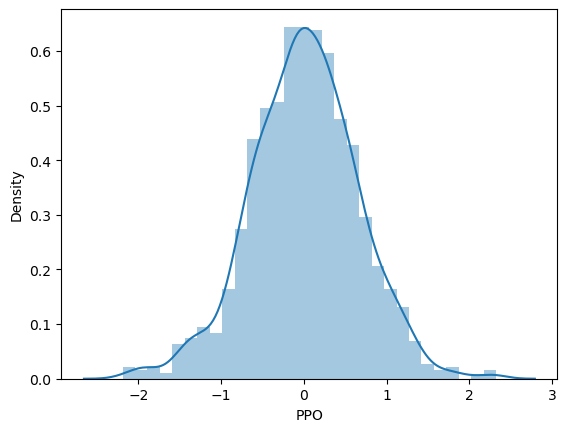

In [33]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    1246.000000
mean        1.462915
std         6.709623
min       -24.278259
25%        -3.158282
50%         2.054808
75%         6.352431
max        23.554162
Name: ROC, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157,6.691180
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755,5.055993
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630,-1.401216
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448,-3.470962
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594,-1.385288


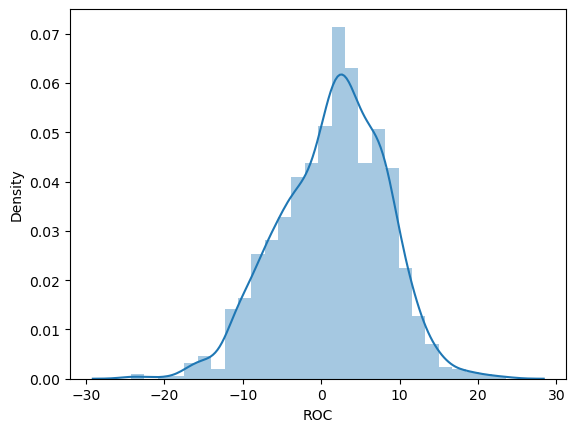

In [34]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    1.249000e+03
mean     2.416771e+09
std      3.647581e+09
min     -4.580526e+09
25%     -1.070211e+09
50%      3.906843e+09
75%      5.431718e+09
max      8.778841e+09
Name: CFI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,...,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,...,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157,6.691180,6.022235e+09
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,...,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755,5.055993,6.045790e+09
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,...,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630,-1.401216,6.021500e+09
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,...,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448,-3.470962,6.005615e+09
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,...,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594,-1.385288,5.996926e+09


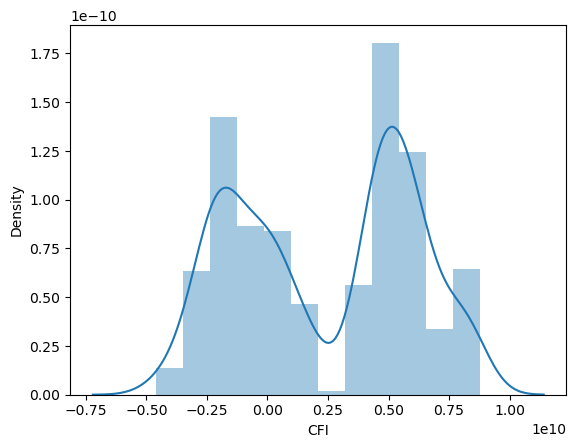

In [35]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    1245.000000
mean        4.216647
std        16.857922
min       -74.747217
25%        -7.857796
50%         5.145062
75%        16.899765
max        47.295450
Name: DMI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,...,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157,6.691180,6.022235e+09,26.407889
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,...,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755,5.055993,6.045790e+09,19.992750
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,...,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630,-1.401216,6.021500e+09,14.305262
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,...,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448,-3.470962,6.005615e+09,11.002132
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,...,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594,-1.385288,5.996926e+09,10.964086


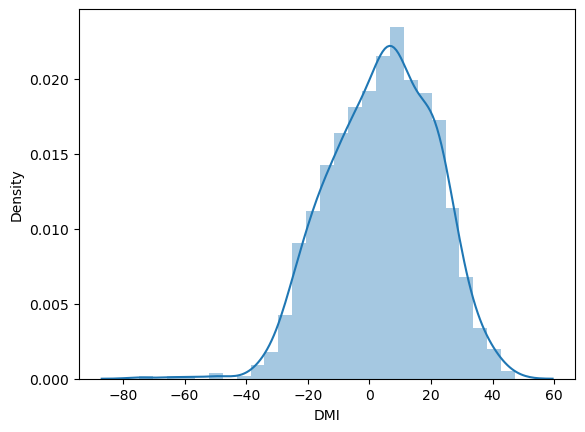

In [36]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    1258.000000
mean       98.919411
std        46.492489
min        34.211502
25%        50.833188
50%       102.398994
75%       142.412287
max       181.607116
Name: SAR, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,signal,RSI,Williams %R,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0,0,63.712121,-21.390473,...,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157,6.691180,6.022235e+09,26.407889,156.330002
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0,0,61.009622,-28.624438,...,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755,5.055993,6.045790e+09,19.992750,156.330002
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0,0,52.582065,-54.005643,...,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630,-1.401216,6.021500e+09,14.305262,156.045602
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0,0,53.315800,-82.465063,...,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448,-3.470962,6.005615e+09,11.002132,155.587466
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48349600,0.0,0.0,0,54.185747,-77.555379,...,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594,-1.385288,5.996926e+09,10.964086,154.913269


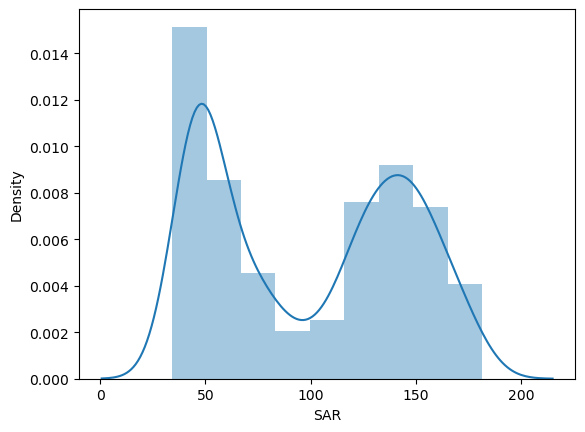

In [37]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [38]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(1258, 23)
(1218, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,signal
Date,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,63.712121,-21.390473,139.386966,152.306741,153.211831,154.560587,154.485953,86.990717,28.213530,0.315483,0.175157,6.691180,6.022235e+09,26.407889,156.330002,0
2023-02-17 00:00:00-05:00,61.009622,-28.624438,139.884083,152.355394,153.158691,154.413501,153.725037,51.424528,20.374572,0.073889,0.011755,5.055993,6.045790e+09,19.992750,156.330002,0
2023-02-21 00:00:00-05:00,52.582065,-54.005643,140.283636,151.580314,152.268187,153.643339,151.198658,5.967208,-2.794500,-0.379079,-0.289630,-1.401216,6.021500e+09,14.305262,156.045602,0
2023-02-22 00:00:00-05:00,53.315800,-82.465063,140.616966,151.046252,151.595557,152.528391,149.782083,-12.780228,-0.523177,-0.652742,-0.470448,-3.470962,6.005615e+09,11.002132,155.587466,0
2023-02-23 00:00:00-05:00,54.185747,-77.555379,141.040663,150.717000,151.082667,151.362042,149.148068,-16.642587,2.212475,-0.794360,-0.562594,-1.385288,5.996926e+09,10.964086,154.913269,0


# 相關性分析

<AxesSubplot:>

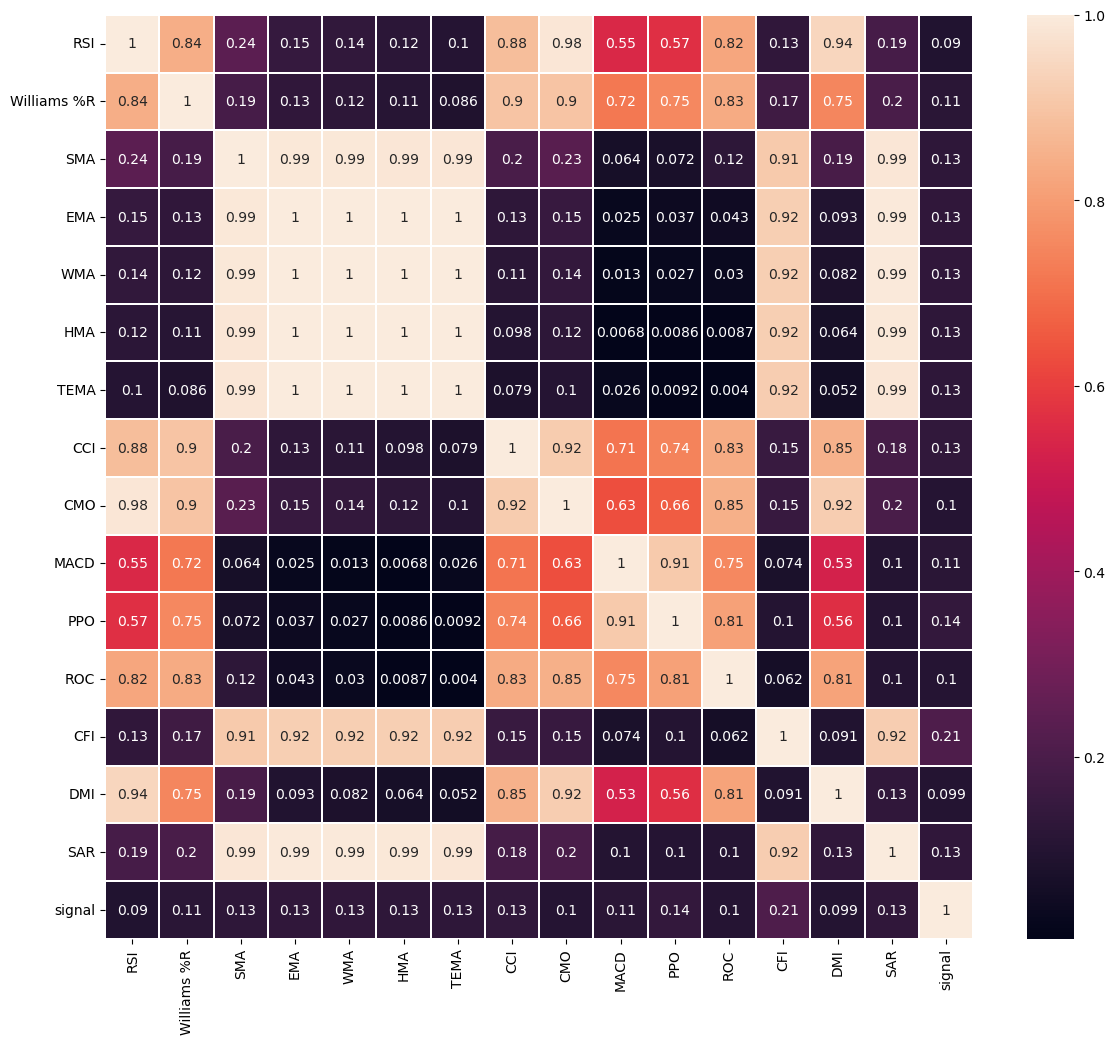

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,index = df.index,columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,signal
Date,,,,,,,,,,,,,,,,
2023-02-16 00:00:00-05:00,0.649137,0.785451,0.758820,0.823780,0.824997,0.826847,0.828553,0.587410,0.640617,0.577485,0.523790,0.647457,0.793657,0.762019,0.828508,0
2023-02-17 00:00:00-05:00,0.606065,0.712792,0.762550,0.824126,0.824622,0.825823,0.823253,0.531359,0.584985,0.527561,0.487596,0.613271,0.795421,0.688929,0.828508,0
2023-02-21 00:00:00-05:00,0.471745,0.457860,0.765548,0.818607,0.818335,0.820460,0.805657,0.459719,0.420557,0.433957,0.420840,0.478275,0.793602,0.624129,0.826579,0
2023-02-22 00:00:00-05:00,0.483440,0.172011,0.768049,0.814804,0.813587,0.812695,0.795791,0.430174,0.436677,0.377406,0.380789,0.435004,0.792413,0.586495,0.823471,0
2023-02-23 00:00:00-05:00,0.497305,0.221324,0.771227,0.812459,0.809966,0.804573,0.791376,0.424087,0.456091,0.348142,0.360378,0.478608,0.791763,0.586062,0.818897,0


In [41]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [42]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 1204/1204 [00:01<00:00, 950.90it/s]

準備完成


# check

In [43]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 1204
第一筆的index開始和結束:2018-04-24-2018-05-14
最後一筆的index開始和結束:2023-02-02-2023-02-23


# Reshape X

(圖片數量,長,寬,1張)

In [44]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(1204, 15, 15)
(1204, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [47]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(1204, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
(1204, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Visualization

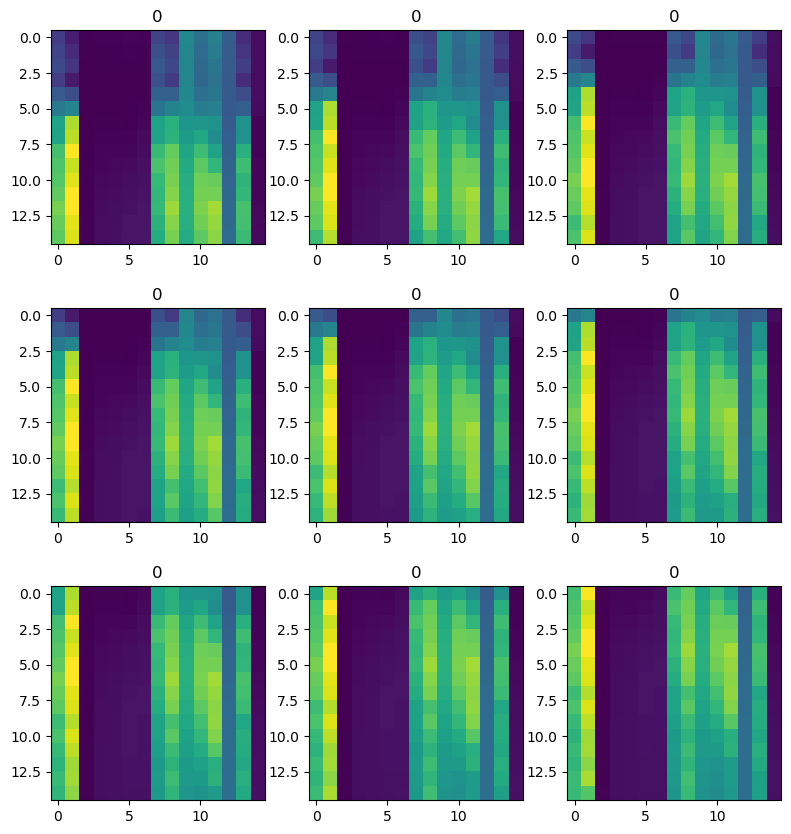

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [49]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(1164, 15, 15, 1) (1164, 3) (40, 15, 15, 1)


# 調整採樣

In [51]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(1164, 225)
(1164,)
0    249
1    249
2    249
Name: 0, dtype: int64
(747, 15, 15, 1)
(747, 3)


# Split training and val sets

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(597, 15, 15, 1) (597, 3) (150, 15, 15, 1) (150, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [53]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

0    557
1    398
2    249
dtype: int64

In [54]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    249
1    249
2    249
dtype: int64

In [55]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    199
1    199
0    199
dtype: int64

In [56]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    50
1    50
2    50
dtype: int64

# CNN

In [57]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [58]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [59]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [60]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [61]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/500
5/5 [==============================] - 2s 101ms/step - loss: 1.1165 - accuracy: 0.3333 - val_loss: 1.0991 - val_accuracy: 0.3200
Epoch 2/500
5/5 [==============================] - 0s 47ms/step - loss: 1.1102 - accuracy: 0.3350 - val_loss: 1.0982 - val_accuracy: 0.3533
Epoch 3/500
5/5 [==============================] - 0s 49ms/step - loss: 1.0961 - accuracy: 0.3451 - val_loss: 1.0986 - val_accuracy: 0.3533
Epoch 4/500
5/5 [==============================] - 0s 50ms/step - loss: 1.0963 - accuracy: 0.3635 - val_loss: 1.0984 - val_accuracy: 0.3267
Epoch 5/500
5/5 [==============================] - 0s 51ms/step - loss: 1.1058 - accuracy: 0.3518 - val_loss: 1.0963 - val_accuracy: 0.3733
Epoch 6/500
5/5 [==============================] - 0s 49ms/step - loss: 1.0952 - accuracy: 0.3283 - val_loss: 1.0956 - val_accuracy: 0.3733
Epoch 7/500
5/5 [==============================] - 0s 50ms/step - loss: 1.0944 - accuracy: 0.3467 - val_loss: 1.0951 - val_accuracy: 0.3733
Epoch 8/500
5/5 [==

# 訓練過程評估

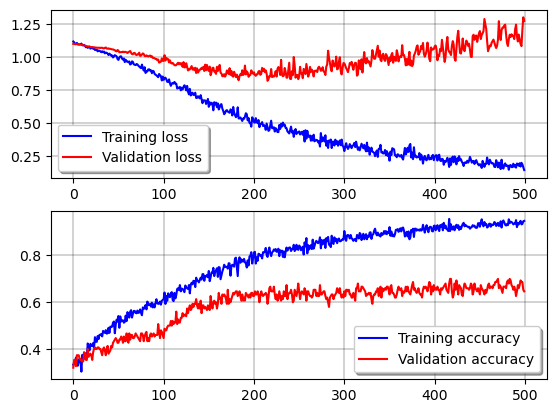

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

5/5 [==============================] - 0s 4ms/step


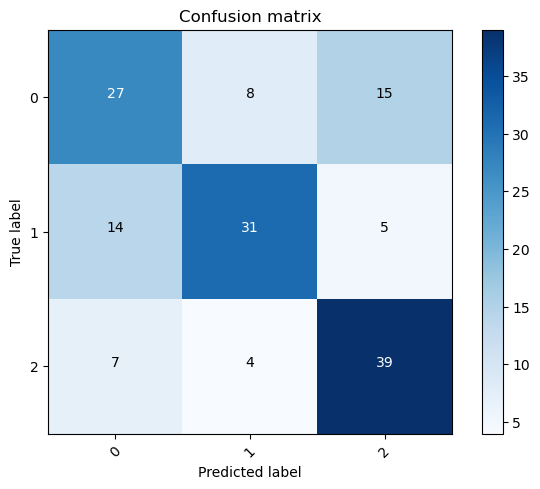

In [63]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [64]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

5/5 [==============================] - 0s 4ms/step
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


真實y值

In [65]:
print(yval[:5])

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


# 分類報告

In [66]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.6466666666666666

In [67]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.56      0.54      0.55        50
         BUY       0.72      0.62      0.67        50
        SELL       0.66      0.78      0.72        50

   micro avg       0.65      0.65      0.65       150
   macro avg       0.65      0.65      0.64       150
weighted avg       0.65      0.65      0.64       150
 samples avg       0.65      0.65      0.65       150



# plot error

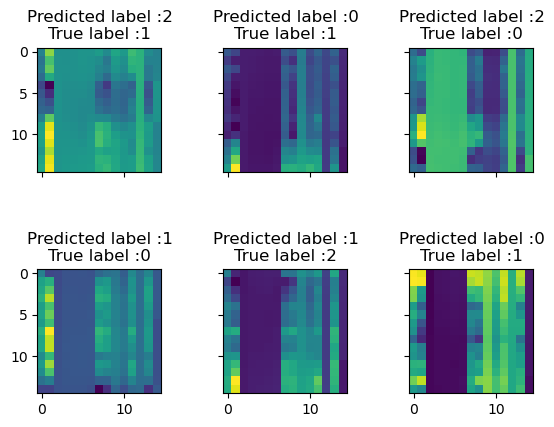

In [68]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [69]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

2/2 [==============================] - 0s 4ms/step
40


# 展示結果

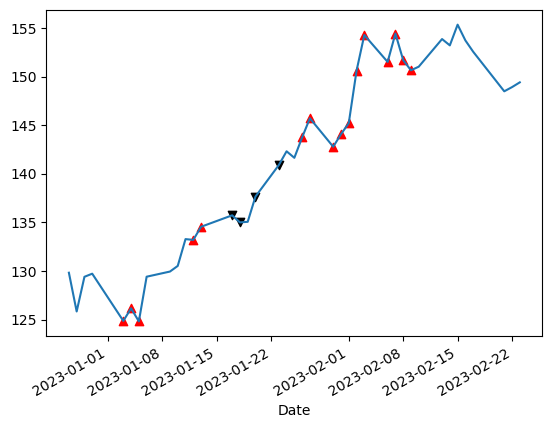

In [80]:
C = apple.history(start=start_date, end=end_date)[['Close']]
C = C.loc[df[-len(answer):].index,:]
C['SIGNAL'] = answer
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black',marker="v")

In [82]:
import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(5)

2/2 [==============================] - 0s 4ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2023-02-16 00:00:00-05:00,153.7100,0.9313,0.0565,0.0122
2023-02-17 00:00:00-05:00,152.5500,0.9637,0.0294,0.0070
2023-02-21 00:00:00-05:00,148.4800,0.9607,0.0232,0.0161
2023-02-22 00:00:00-05:00,148.9100,0.5718,0.0333,0.3949
2023-02-23 00:00:00-05:00,149.4000,0.5902,0.0198,0.3900


In [83]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
勝率(df)

0.5685534591194968

In [86]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.5685534591194968 0.5832122411483374 0.43144654088050316 -0.5596575614733573
0.33158733710572136 0.24146231897529757


1.3732467182162857

In [87]:
賠率

0.43144654088050316

# save model

In [88]:
model.save('Rikcy_net.h5')
del model

In [91]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 [==============================] - 0s 4ms/step


array([[0.9313318 , 0.05650971, 0.01215848],
       [0.9636531 , 0.02938471, 0.00696221],
       [0.9606734 , 0.02323886, 0.01608775],
       [0.5717718 , 0.03328347, 0.39494473],
       [0.59017634, 0.01981878, 0.39000484]], dtype=float32)